In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from flaml import AutoML
from sklearn.model_selection import train_test_split
import pickle



In [2]:
data = pd.read_csv("./data/data_sepsis.csv")
print(data)

            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]


In [3]:
data["Sepssis"] = data["Sepssis"].map({"Negative": 0, "Positive": 1})
print(data)

            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0        1
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0        0
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1        1
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1        0
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1        1
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...      ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0        0
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1        1
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1        0
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0        0
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1        1

[599 rows x 11 columns]


In [12]:
y = data['Sepssis']
x = data.drop(['ID', 'Sepssis'], axis=1)

print(y)
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
594    0
595    1
596    0
597    0
598    1
Name: Sepssis, Length: 599, dtype: int64
     PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0      6  148  72  35    0  33.6  0.627   50          0
1      1   85  66  29    0  26.6  0.351   31          0
2      8  183  64   0    0  23.3  0.672   32          1
3      1   89  66  23   94  28.1  0.167   21          1
4      0  137  40  35  168  43.1  2.288   33          1
..   ...  ...  ..  ..  ...   ...    ...  ...        ...
594    6  123  72  45  230  33.6  0.733   34          0
595    0  188  82  14  185  32.0  0.682   22          1
596    0   67  76   0    0  45.3  0.194   46          1
597    1   89  24  19   25  27.8  0.559   21          0
598    1  173  74   0    0  36.8  0.088   38          1

[599 rows x 9 columns]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [14]:
print("Taille x_train :", len(x_train), "Taille x_test",len(x_test))
print("Taille y_train :", len(y_train), "taille y_test", len(y_test))

Taille x_train : 479 Taille x_test 120
Taille y_train : 479 taille y_test 120


In [31]:
print(y_test)

442    0
286    0
379    0
522    0
200    0
      ..
5      0
223    0
159    1
38     1
192    1
Name: Sepssis, Length: 120, dtype: int64


In [49]:
settings = {
"time_budget": 60,  # total running time in seconds
"metric": 'accuracy', 
"task": 'classification',  # task type
"log_file_name": 'modelv1.log',  # flaml log file
"seed": 1,    # random seed
}


automl = AutoML()
automl.fit(x_train, y_train,**settings)


[flaml.automl.automl: 03-30 18:38:50] {2726} INFO - task = classification
[flaml.automl.automl: 03-30 18:38:50] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 03-30 18:38:50] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-30 18:38:50] {2858} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 03-30 18:38:50] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 03-30 18:38:50] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-30 18:38:50] {3472} INFO - Estimated sufficient time budget=2330s. Estimated necessary time budget=54s.
[flaml.automl.automl: 03-30 18:38:50] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.3424,	best estimator lgbm's best error=0.3424
[flaml.automl.automl: 03-30 18:38:50] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-30 18:38:51] {3519} INFO -  at 0.5s,	estimator lgbm's best error=

d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:38:52] {3519} INFO -  at 1.3s,	estimator xgboost's best error=0.2463,	best estimator lgbm's best error=0.2443


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:38:52] {3334} INFO - iteration 5, current learner lgbm
[flaml.automl.automl: 03-30 18:38:52] {3519} INFO -  at 1.7s,	estimator lgbm's best error=0.2443,	best estimator lgbm's best error=0.2443
[flaml.automl.automl: 03-30 18:38:52] {3334} INFO - iteration 6, current learner lgbm
[flaml.automl.automl: 03-30 18:38:52] {3519} INFO -  at 1.9s,	estimator lgbm's best error=0.2443,	best estimator lgbm's best error=0.2443
[flaml.automl.automl: 03-30 18:38:52] {3334} INFO - iteration 7, current learner lgbm
[flaml.automl.automl: 03-30 18:38:52] {3519} INFO -  at 2.1s,	estimator lgbm's best error=0.2422,	best estimator lgbm's best error=0.2422
[flaml.automl.automl: 03-30 18:38:52] {3334} INFO - iteration 8, current learner lgbm
[flaml.automl.automl: 03-30 18:38:53] {3519} INFO -  at 2.4s,	estimator lgbm's best error=0.2422,	best estimator lgbm's best error=0.2422
[flaml.automl.automl: 03-30 18:38:53] {3334} INFO - iteration 9, current learner lgbm
[flaml.automl.auto

d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:38:53] {3519} INFO -  at 3.2s,	estimator xgboost's best error=0.2297,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:53] {3334} INFO - iteration 11, current learner extra_tree


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:38:54] {3519} INFO -  at 3.8s,	estimator extra_tree's best error=0.2901,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:54] {3334} INFO - iteration 12, current learner rf
[flaml.automl.automl: 03-30 18:38:55] {3519} INFO -  at 4.4s,	estimator rf's best error=0.2547,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:55] {3334} INFO - iteration 13, current learner xgboost


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:38:55] {3519} INFO -  at 4.7s,	estimator xgboost's best error=0.2297,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:55] {3334} INFO - iteration 14, current learner xgboost


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:38:55] {3519} INFO -  at 5.0s,	estimator xgboost's best error=0.2297,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:55] {3334} INFO - iteration 15, current learner extra_tree


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:38:56] {3519} INFO -  at 5.4s,	estimator extra_tree's best error=0.2901,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:56] {3334} INFO - iteration 16, current learner rf
[flaml.automl.automl: 03-30 18:38:56] {3519} INFO -  at 5.9s,	estimator rf's best error=0.2547,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:56] {3334} INFO - iteration 17, current learner extra_tree
[flaml.automl.automl: 03-30 18:38:57] {3519} INFO -  at 6.7s,	estimator extra_tree's best error=0.2673,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:57] {3334} INFO - iteration 18, current learner rf
[flaml.automl.automl: 03-30 18:38:58] {3519} INFO -  at 7.4s,	estimator rf's best error=0.2547,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:58] {3334} INFO - iteration 19, current learner xgboost


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:38:58] {3519} INFO -  at 7.9s,	estimator xgboost's best error=0.2297,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:58] {3334} INFO - iteration 20, current learner rf
[flaml.automl.automl: 03-30 18:38:59] {3519} INFO -  at 8.5s,	estimator rf's best error=0.2506,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:59] {3334} INFO - iteration 21, current learner xgboost


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:38:59] {3519} INFO -  at 8.9s,	estimator xgboost's best error=0.2297,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:38:59] {3334} INFO - iteration 22, current learner xgboost


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:39:00] {3519} INFO -  at 9.4s,	estimator xgboost's best error=0.2297,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:39:00] {3334} INFO - iteration 23, current learner xgboost


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:39:00] {3519} INFO -  at 9.8s,	estimator xgboost's best error=0.2297,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:39:00] {3334} INFO - iteration 24, current learner extra_tree


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:39:00] {3519} INFO -  at 10.3s,	estimator extra_tree's best error=0.2673,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:39:00] {3334} INFO - iteration 25, current learner extra_tree
[flaml.automl.automl: 03-30 18:39:01] {3519} INFO -  at 11.0s,	estimator extra_tree's best error=0.2673,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:39:01] {3334} INFO - iteration 26, current learner xgboost


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:39:02] {3519} INFO -  at 11.5s,	estimator xgboost's best error=0.2297,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:39:02] {3334} INFO - iteration 27, current learner xgboost


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Program

[flaml.automl.automl: 03-30 18:39:02] {3519} INFO -  at 11.9s,	estimator xgboost's best error=0.2297,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:39:02] {3334} INFO - iteration 28, current learner extra_tree
[flaml.automl.automl: 03-30 18:39:03] {3519} INFO -  at 12.4s,	estimator extra_tree's best error=0.2673,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:39:03] {3334} INFO - iteration 29, current learner extra_tree
[flaml.automl.automl: 03-30 18:39:03] {3519} INFO -  at 13.3s,	estimator extra_tree's best error=0.2631,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:39:03] {3334} INFO - iteration 30, current learner lgbm
[flaml.automl.automl: 03-30 18:39:04] {3519} INFO -  at 13.6s,	estimator lgbm's best error=0.2422,	best estimator xgboost's best error=0.2297
[flaml.automl.automl: 03-30 18:39:04] {3334} INFO - iteration 31, current learner lgbm
[flaml.automl.automl: 03-30 18:39:04] {3519} INFO -  at 1

d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:39:05] {3519} INFO -  at 14.6s,	estimator xgboost's best error=0.2296,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 03-30 18:39:05] {3334} INFO - iteration 34, current learner lgbm
[flaml.automl.automl: 03-30 18:39:05] {3519} INFO -  at 15.1s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 03-30 18:39:05] {3334} INFO - iteration 35, current learner lgbm
[flaml.automl.automl: 03-30 18:39:06] {3519} INFO -  at 15.4s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 03-30 18:39:06] {3334} INFO - iteration 36, current learner rf
[flaml.automl.automl: 03-30 18:39:07] {3519} INFO -  at 16.3s,	estimator rf's best error=0.2506,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 03-30 18:39:07] {3334} INFO - iteration 37, current learner lgbm
[flaml.automl.automl: 03-30 18:39:07] {3519} INFO -  at 17.1s,	estimator lgbm's best error=0.2235

d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:39:15] {3519} INFO -  at 24.5s,	estimator xgboost's best error=0.2296,	best estimator lgbm's best error=0.2214
[flaml.automl.automl: 03-30 18:39:15] {3334} INFO - iteration 51, current learner lgbm


d:\Programmation\Projet_Annuel\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-30 18:39:15] {3519} INFO -  at 24.9s,	estimator lgbm's best error=0.2214,	best estimator lgbm's best error=0.2214
[flaml.automl.automl: 03-30 18:39:15] {3334} INFO - iteration 52, current learner lgbm
[flaml.automl.automl: 03-30 18:39:15] {3519} INFO -  at 25.2s,	estimator lgbm's best error=0.2214,	best estimator lgbm's best error=0.2214
[flaml.automl.automl: 03-30 18:39:15] {3334} INFO - iteration 53, current learner lgbm
[flaml.automl.automl: 03-30 18:39:16] {3519} INFO -  at 25.5s,	estimator lgbm's best error=0.2214,	best estimator lgbm's best error=0.2214
[flaml.automl.automl: 03-30 18:39:16] {3334} INFO - iteration 54, current learner lgbm
[flaml.automl.automl: 03-30 18:39:16] {3519} INFO -  at 25.9s,	estimator lgbm's best error=0.2214,	best estimator lgbm's best error=0.2214
[flaml.automl.automl: 03-30 18:39:16] {3334} INFO - iteration 55, current learner lgbm
[flaml.automl.automl: 03-30 18:39:16] {3519} INFO -  at 26.1s,	estimator lgbm's best error=0.221

In [50]:
from sklearn.metrics import accuracy_score

y_pred = automl.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7166666666666667


In [52]:
print("Meilleur modèle :", automl.model)
print("Paramètres :", automl.best_config)


Meilleur modèle : <flaml.automl.model.ExtraTreesEstimator object at 0x000001C787E682E0>
Paramètres : {'n_estimators': 30, 'max_features': 0.8691393278586136, 'max_leaves': 19, 'criterion': 'entropy'}


In [53]:

# Sauvegarder le modèle
with open("./trained_models/best_model.pkl", "wb") as file:
    pickle.dump(automl.model, file)



In [54]:
# Charger le modèle
with open("./trained_models/best_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [55]:
'''compute predictions of testing dataset''' 
y_pred = automl.predict(x_test)
y_pred_proba = automl.predict_proba(x_test)
# print(y_pred_proba)


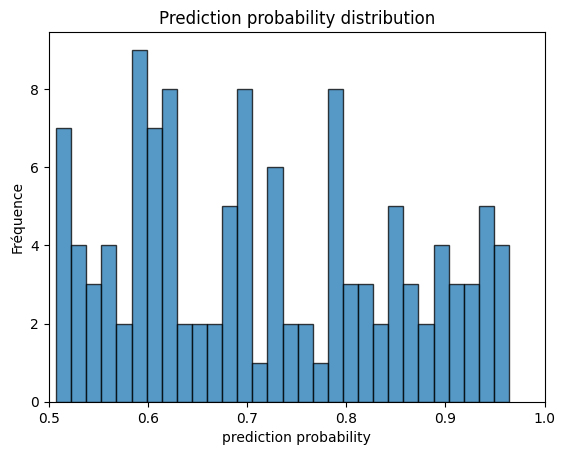

In [66]:
# Prediction probability histogramme
choised_proba = []
for dual_prob in y_pred_proba:
    if dual_prob[0] >= dual_prob[1]:
        choised_proba.append(dual_prob[0])
    else:
        choised_proba.append(dual_prob[1])

plt.hist(choised_proba, bins=30, edgecolor='black', alpha=0.75)
plt.xlim(0.5,1)
plt.xlabel('prediction probability')
plt.ylabel('Fréquence')
plt.title('Prediction probability distribution')

# Affichez l'histogramme
plt.show()


In [56]:
pred_df = pd.DataFrame(y_pred_proba,columns=["proba_0","proba_1"])
pred_df["pred"] = y_pred

print(pred_df)

      proba_0   proba_1  pred
0    0.732216  0.267784     0
1    0.376479  0.623521     1
2    0.663205  0.336795     0
3    0.854686  0.145314     0
4    0.788826  0.211174     0
..        ...       ...   ...
115  0.686764  0.313236     0
116  0.507736  0.492264     0
117  0.322098  0.677902     1
118  0.802572  0.197428     0
119  0.410070  0.589930     1

[120 rows x 3 columns]


In [57]:
proba = automl.predict_proba(x_test)[:,1]
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', proba, y_test))

accuracy = 0.7166666666666667
roc_auc = 0.757476076555024
log_loss = 0.5541923366768677


In [58]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 479, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 479, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 10, 'learning_rate': 0.24265799106484617, 'log_max_bin': 7, 'colsample_bytree': 0.9350250030443705, 'reg_alpha': 0.0016817704116337995, 'reg_lambda': 0.2602716047300951}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 10, 'learning_rate': 0.24265799106484617, 'log_max_bin': 7, 'colsample_bytree

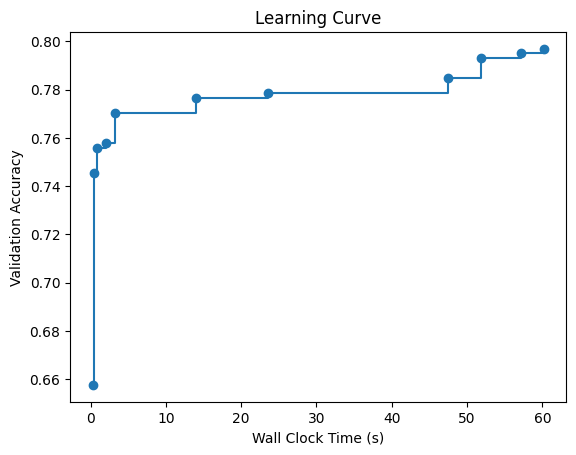

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()